# Basics of Cluster Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load Data

In [3]:
data = pd.read_csv("country_clusters.csv")

In [5]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Plot the Data

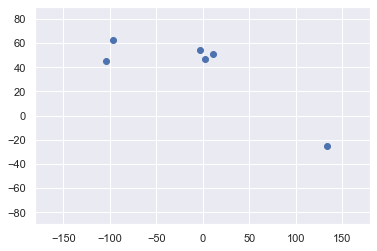

In [7]:
#longitude is x, latitude is y
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

### Select the Features

In [8]:
#all rows, cols 1 & 2
x = data.iloc[:, 1:3]

x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [21]:
kmeans = KMeans(3) #number of clusters I want to produce

In [22]:
kmeans.fit(x)

KMeans(n_clusters=3)

### Clustering Results

In [23]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [24]:
#create copy of data
data_with_clusters = data.copy()

#add new column with cluster predictions
data_with_clusters["Cluster"] = identified_clusters

data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


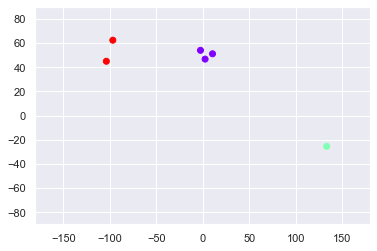

In [25]:
plt.scatter(data_with_clusters["Longitude"],
            data_with_clusters["Latitude"], 
            c = data_with_clusters["Cluster"], 
            cmap = 'rainbow')

plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

### Clustering Categorical Data

In [27]:
#create new variable 
data_mapped = data.copy()

#map language column with numbers
data_mapped["Language"] = data_mapped["Language"].map({'English': 0, 'French': 1, 'German': 2})

data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [36]:
#get only language column

x = data_mapped.iloc[:, 3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


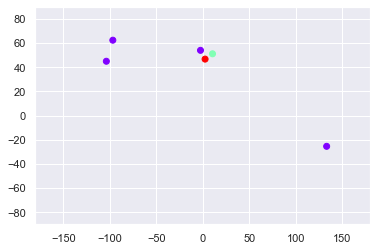

In [37]:
kmeans = KMeans(3) #number of clusters I want to produce

#fit on x
kmeans.fit(x)

#predict
identified_clusters = kmeans.fit_predict(x)

#create copy of data
data_with_clusters = data_mapped.copy()

#add new column with cluster predictions
data_with_clusters["Cluster"] = identified_clusters

#plot
plt.scatter(data_with_clusters["Longitude"],
            data_with_clusters["Latitude"], 
            c = data_with_clusters["Cluster"], 
            cmap = 'rainbow')

plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [39]:
#get last three columns

x = data_mapped.iloc[:, 1:4]

x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


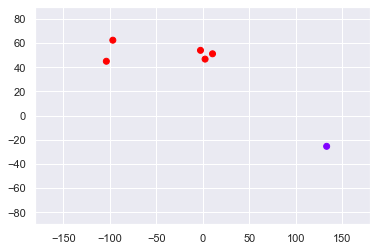

In [40]:
kmeans = KMeans(2) #number of clusters I want to produce

#fit on x
kmeans.fit(x)

#predict
identified_clusters = kmeans.fit_predict(x)

#create copy of data
data_with_clusters = data_mapped.copy()

#add new column with cluster predictions
data_with_clusters["Cluster"] = identified_clusters

#plot
plt.scatter(data_with_clusters["Longitude"],
            data_with_clusters["Latitude"], 
            c = data_with_clusters["Cluster"], 
            cmap = 'rainbow')

plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [43]:
kmeans = KMeans(2, random_state = 123) #number of clusters I want to produce

#fit on x
kmeans.fit(x)

#predict
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 0], dtype=int32)

In [44]:
#create copy of data
data_with_clusters = data_mapped.copy()

#add new column with cluster predictions
data_with_clusters["Cluster"] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


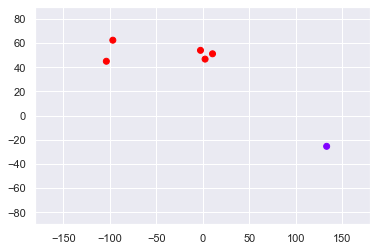

In [45]:
kmeans = KMeans(2, random_state = 123) #number of clusters I want to produce

#fit on x
kmeans.fit(x)

#predict
identified_clusters = kmeans.fit_predict(x)

#create copy of data
data_with_clusters = data_mapped.copy()

#add new column with cluster predictions
data_with_clusters["Cluster"] = identified_clusters

#plot
plt.scatter(data_with_clusters["Longitude"],
            data_with_clusters["Latitude"], 
            c = data_with_clusters["Cluster"], 
            cmap = 'rainbow')

plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

### Selecting the number of clusters

#### WCSS

In [46]:
kmeans.inertia_

13208.958119999996

In [47]:
wcss = []

for i in range (1, 7):
    kmeans = KMeans(i, random_state = 123)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [48]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

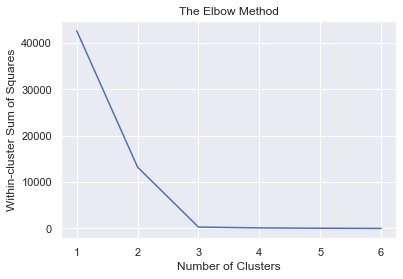

In [49]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

#choose 3 clusters for this dataset because inertia drops off at 3